In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm


os.chdir(os.path.join(os.getcwd(),"drive","My Drive","NECS_personal","inventory"))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
inv_data = pd.read_csv('2018_to_2020_July_Inv_Data.csv',engine='python')
inv_data.rename(columns={"Unnamed: 0": "Inventory"},inplace=True)

In [ ]:
inv_data.head(20)

,Inventory,Type,Date,Num,Memo,Name,Qty,Sales Price,Amount,Balance
0,1-QD102- 1 1/4 (1-QD102- 1 1/4 Boswell),Invoice,1/11/2018,2361,counter top total square feet 58.25 @$55/sf,Retail Customer,1.0,3203.75,3203.75,3203.75
1,1-QD102- 1 1/4 (1-QD102- 1 1/4 Boswell),Invoice,1/13/2018,2366 SC,Q102 44*45,kai lau,1.0,1980,1980.00,5183.75
2,1-QD102- 1 1/4 (1-QD102- 1 1/4 Boswell),Invoice,1/18/2018,2374,"1-QD102- 1 1/4 Boswell 12""x72""",Retail Customer,1.0,306,306.00,5489.75
3,1-QD165 - 1 1/4 (126*63 1 1/4 Weatherford),Invoice,4/3/2018,2484,126*63 1 1/4 Weatherford,meijianzhong,2.0,939,1878.00,1878.00
4,1-QF601- 1 1/4 (1-QF601- 1 1/4 Denali),Invoice,2/21/2018,2410,1 1/4 Denali Main Kitchen total 67SF @ $60,Evaldo Deoliveira,1.0,4020,4020.00,4020.00
5,1-QF601- 1 1/4 (1-QF601- 1 1/4 Denali),Invoice,2/21/2018,2410,1 1/4 Denali === 2nd Floor Bathroom Cream Whit...,Evaldo Deoliveira,1.0,900,900.00,4920.00
6,1-QF601- 1 1/4 (1-QF601- 1 1/4 Denali),Invoice,8/28/2018,2811,1-QF601- 1 1/4 Denali,sean yang,2.0,1200,2400.00,7320.00
7,1-QF601- 1 1/4 (1-QF601- 1 1/4 Denali),Invoice,7/22/2019,3481,1-QF601- 1 1/4 Denali Customer provides the sink,Jen Ya,1.0,3920,3920.00,11240.00
8,1-QF601- 1 1/4 (1-QF601- 1 1/4 Denali),Credit Memo,8/15/2019,3526,1-QF601- 1 1/4 Denali,Jen Ya,-1.0,3920,-3920.00,7320.00
9,1-QF602- 1 1/4 (1-QF602- 1 1/4 Weisshorn),Invoice,1/2/2018,2358,1-QF602- 1 1/4 Weisshorn,sean yang,1.0,1086,1086.00,1086.00


In [ ]:
import datetime as dt
inv_data['Date'] = pd.to_datetime(inv_data['Date'])
# inv_data['Date'] = inv_data['Date'].dt.strftime('%d.%m.%Y')
# inv_data['Date'] = pd.to_datetime(inv_data['Date'])

In [ ]:
inv_data['Date'].max()

Timestamp('2020-07-31 00:00:00')

In [ ]:
ready_array = np.unique([x for x in inv_data['Inventory'] if "(" not in x])


In [ ]:
for i in inv_data.index:
  inv_name = inv_data.iloc[i]["Inventory"]
  print(inv_name)
  if inv_name in ready_array: # no ( in string
    inv_name = inv_name.split('-')
    if len(inv_name)<2:
      inv_name = '-'.join(inv_name)
    else:
      inv_name = inv_name[1]
  else: # has ( in string
    if "handle" in inv_name.lower():
      continue
    inv_name = inv_name.split(' (',1)[0].split('-')
    if len(inv_name)<2:
      inv_name = '-'.join(inv_name)
    else:
      if len(inv_name[1])<=2:
        try:
          inv_name = ''.join([inv_name[1],inv_name[2]])
        except:
          inv_name = inv_name[1]
      else:
        inv_name = inv_name[1]
  if inv_name == "TK": inv_name = "TK8"
  inv_data.at[i, "Inventory"] = inv_name

In [ ]:
pd.set_option('display.max_rows', 30)
sum_qty = inv_data[['Inventory','Qty']].groupby(['Inventory']).sum().sort_values(by='Qty',ascending=False)
sum_qty.head(30)

,Qty
Inventory,
"HANDLE-3916-5"" (????)",3162.0
TK8,1698.0
"HANDLE-3916-7"" (????)",1426.0
CM8,1072.0
"HANDLE-3312-6"" (????)",689.0
Sales Tax,597.0
BF3,586.0
REF2496,557.0
B24,501.0


In [ ]:
#@title top sold inventory
sum_qty.index[0:50]
"""
TK8, CM8, BF3, REF2496,B24,WF330,B18,B30,W2430,
B15,B12,SB36,SB30,W3012,OCM8,PN4896,WF696,LSB36,
WF696,W3030,B21,W2130,W1230,B36,WDC2430,WF339,
W1830,B27,B09,W3018,CCM3,REP1.5x96,W2439,OBM3311,
W1530,W3015,BRP2430,W3630,CCM4,W3021


really need to have more data.
Currently only all will be able to work under 1 week frequency data
when trying 1 month, other TK8 others don't work.
"""


'\nTK8, CM8, BF3, REF2496,B24,WF330,B18,B30,W2430,\nB15,B12,SB36,SB30W3012,OCM8,PN4896,WF696,LSB36,\nWF696,W3030,B21,W2130,W1230,B36,WDC2430,WF339,\nW1830,B27,B09,W3018,CCM3,REP1.5x96,W2439,OBM3311,\nW1530,W3015,BRP2430,W3630,CCM4,W3021\n\n\n'

In [ ]:
inv_data.sample(10)

In [ ]:
inv_name = np.array(inv_data['Inventory'])

In [ ]:
sum_qty.index

In [ ]:
# need to filter out rows of each unique inventory, form a time series dataframe, 
# and do the time series analysis for each one of them. 
# machine learning algorithms probably later.


In [ ]:
inv_data.dtypes

Inventory              object
Type                   object
Date           datetime64[ns]
Num                    object
Memo                   object
Name                   object
Qty                   float64
Sales Price            object
Amount                float64
Balance               float64
dtype: object

In [ ]:
target = "B21"
target_df = inv_data[inv_data['Inventory'] == target]
target_df.drop(columns=["Type","Memo","Name","Sales Price","Amount","Balance"],inplace=True)

target_df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Inventory,Date,Num,Qty
128,B21,2018-07-21,2702,2.0
348,B21,2018-05-10,2546 C,1.0
349,B21,2018-05-10,2546 C,1.0
350,B21,2018-08-02,2729,2.0
351,B21,2019-02-22,3128,1.0
...,...,...,...,...
16551,B21,2019-10-09,3609,2.0
16552,B21,2019-10-15,3617,1.0
16553,B21,2019-10-31,3646,2.0
16554,B21,2019-11-09,3671,1.0


In [ ]:
target_df = target_df.set_index('Date')
target_df.sort_index(inplace=True)
target_df = target_df.groupby(target_df.index)['Qty'].sum()
target_df = target_df.resample('1W').sum()

In [ ]:
target_df['2020':]

Date
2020-01-05    0.0
2020-01-12    1.0
2020-01-19    0.0
2020-01-26    6.0
2020-02-02    2.0
2020-02-09    4.0
2020-02-16    1.0
2020-02-23    0.0
2020-03-01    2.0
2020-03-08    3.0
2020-03-15    1.0
2020-03-22    3.0
2020-03-29    3.0
2020-04-05    1.0
2020-04-12    4.0
2020-04-19    2.0
2020-04-26    0.0
2020-05-03    1.0
2020-05-10    7.0
2020-05-17    0.0
2020-05-24   -2.0
2020-05-31    6.0
2020-06-07    1.0
2020-06-14    3.0
2020-06-21    2.0
2020-06-28    3.0
2020-07-05    4.0
2020-07-12    6.0
2020-07-19    6.0
2020-07-26    4.0
2020-08-02    2.0
Freq: W-SUN, Name: Qty, dtype: float64

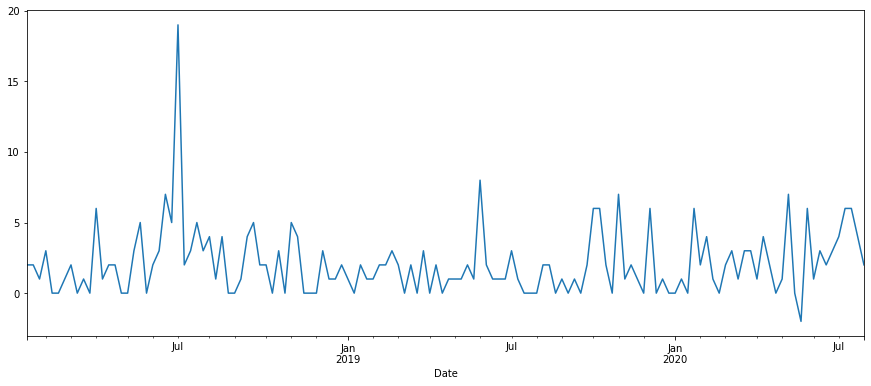

In [ ]:
target_df.plot(figsize=(15,6))
plt.show()

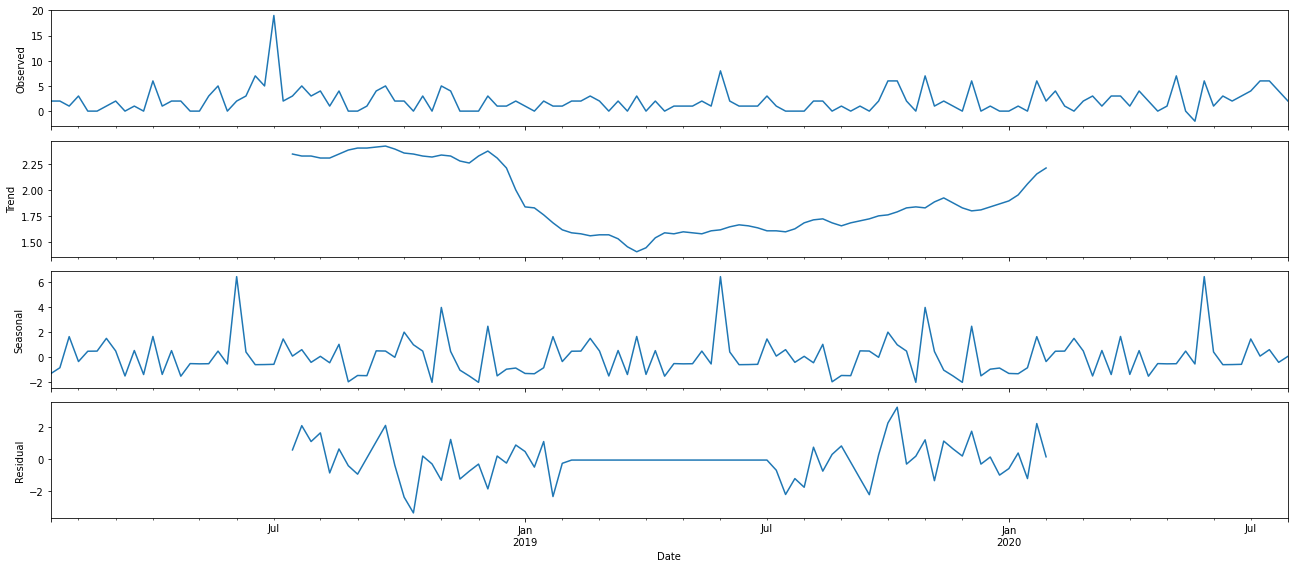

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 18,8

decomposition = sm.tsa.seasonal_decompose(target_df, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [ ]:
best_combine = [0,0,10000]
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(target_df, 
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit(maxiter=200)
      print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal,results.aic))
      if best_combine[2] >= results.aic:
        best_combine = [param, param_seasonal, results.aic]
    except:
      continue


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 691.5500662535414
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 618.7927537893831
ARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC: 519.10525052482
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 647.3828703336196
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: 496.0737536258126
ARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC: 453.95689501226934
ARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC: 693.9526418737464
ARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC: 496.128460104767
ARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC: 409.59160674574247
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: 617.6166461966735
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: 583.6461262873058
ARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC: 509.38106791889214
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 566.0353868096732
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: 504.33146302827737
ARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC: 455.1148414078855
ARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC: 570.5736708613148
ARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC: 505.8035785030081
ARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC: 423.00061346201426
ARIMA(0, 0, 0)x(2, 0, 0, 1

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC: 481.183380256351
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 639.4553647867785
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 623.1407466472281
ARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 529.5973379460721
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 610.8745935425039
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 574.4331599509061
ARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC: 498.4053726167514
ARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC: 611.2739932183953
ARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC: 556.6896973778684
ARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC: 478.4654370715751
ARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC: 566.0562072341165
ARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC: 560.0013277649994
ARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC: 531.5643860508178
ARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC: 507.9574413529275
ARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC: 506.6593113573707
ARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC: 499.6626416767648
ARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC: 502.84966805499397
ARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC: 477.1080553779235
ARIMA(0, 1, 0)x(2, 2, 2, 12)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC: 431.83426973572324
ARIMA(1, 2, 1)x(2, 0, 0, 12) - AIC: 513.0293552517398
ARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC: 515.0183199228179
ARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC: 503.1469716367546
ARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC: 482.6555190229336
ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC: 480.51574308409903
ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC: 470.42290044615225
ARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC: 483.5688136717688
ARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC: 456.3876114283313
ARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC: 450.58480457754365
ARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC: 618.3972761565207
ARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC: 568.8726715732654
ARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC: 461.0085303297636
ARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC: 645.3094551627814
ARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC: 501.239047120663
ARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC: 451.25798113132595
ARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC: 691.7697046420516
ARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC: 505.9594235181814
ARIMA(1, 2, 2)x(0, 2, 2,

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(0, 1, 1, 12) - AIC: 580.1720236701176
ARIMA(2, 2, 0)x(0, 1, 2, 12) - AIC: 517.8060844593747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 0)x(0, 2, 0, 12) - AIC: 754.8792702037367
ARIMA(2, 2, 0)x(0, 2, 1, 12) - AIC: 570.4927814436872
ARIMA(2, 2, 0)x(0, 2, 2, 12) - AIC: 476.21090641932045
ARIMA(2, 2, 0)x(1, 0, 0, 12) - AIC: 653.1158537459372
ARIMA(2, 2, 0)x(1, 0, 1, 12) - AIC: 643.3281754560256
ARIMA(2, 2, 0)x(1, 0, 2, 12) - AIC: 555.4020136624614
ARIMA(2, 2, 0)x(1, 1, 0, 12) - AIC: 605.7107749151274
ARIMA(2, 2, 0)x(1, 1, 1, 12) - AIC: 576.55580161554
ARIMA(2, 2, 0)x(1, 1, 2, 12) - AIC: 526.182898315328
ARIMA(2, 2, 0)x(1, 2, 0, 12) - AIC: 603.1613588498125
ARIMA(2, 2, 0)x(1, 2, 1, 12) - AIC: 572.705992752887
ARIMA(2, 2, 0)x(1, 2, 2, 12) - AIC: 478.2108635978243
ARIMA(2, 2, 0)x(2, 0, 0, 12) - AIC: 549.40672417183
ARIMA(2, 2, 0)x(2, 0, 1, 12) - AIC: 551.3977016349357
ARIMA(2, 2, 0)x(2, 0, 2, 12) - AIC: 551.0965125237532
ARIMA(2, 2, 0)x(2, 1, 0, 12) - AIC: 518.1136593869269
ARIMA(2, 2, 0)x(2, 1, 1, 12) - AIC: 506.6015873616844
ARIMA(2, 2, 0)x(2, 1, 2, 12) - AIC: 507.9265571474175
ARIMA(2, 2, 0)x(2, 2, 0, 12) - AI

In [ ]:
print(combine_list[0])

[(0, 2, 2), (0, 2, 2, 12), 401.2181781620149]


In [ ]:
mod = sm.tsa.statespace.SARIMAX(target_df,
                                order=combine_list[0][0],
                                seasonal_order=combine_list[0][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
res = mod.fit()
print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1237      0.076    -27.830      0.000      -2.273      -1.974
ma.L2          1.1456      0.075     15.257      0.000       0.998       1.293
ma.S.L12      -1.8872   1841.451     -0.001      0.999   -3611.065    3607.291
ma.S.L24       1.0000   1951.595      0.001      1.000   -3824.055    3826.055
sigma2         3.7686   7354.741      0.001      1.000   -1.44e+04    1.44e+04


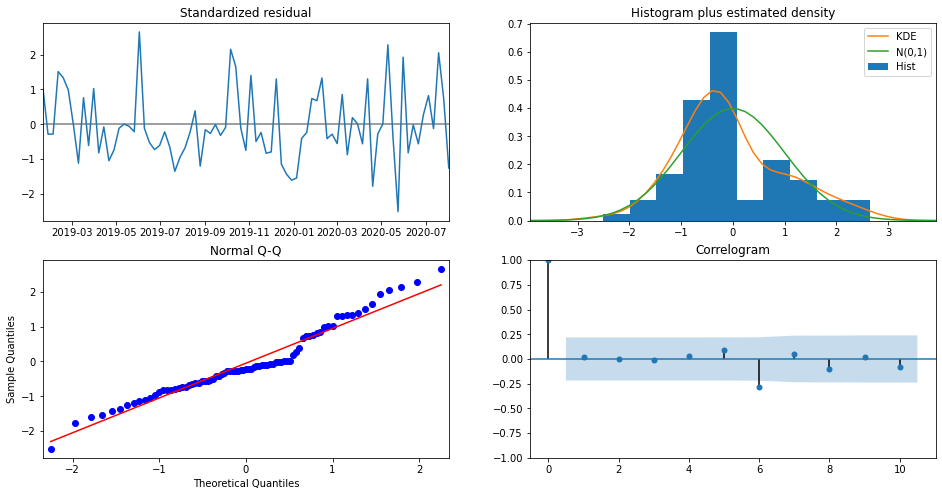

In [ ]:
res.plot_diagnostics(figsize=(16,8))
plt.show()

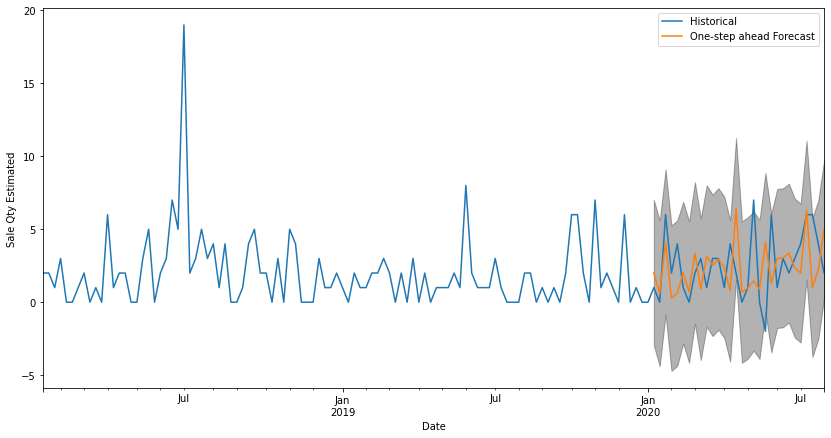

In [ ]:
# validating forecasts
pred = res.get_prediction(start=pd.to_datetime('2020-01-12'),dynamic=False)
pred_ci = pred.conf_int()

ax = target_df['2018':].plot(label='Historical')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=1,figsize=(14,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Sale Qty Estimated')
plt.legend()
plt.show()

In [ ]:

prediction = res.get_forecast(steps=50)
print(prediction)

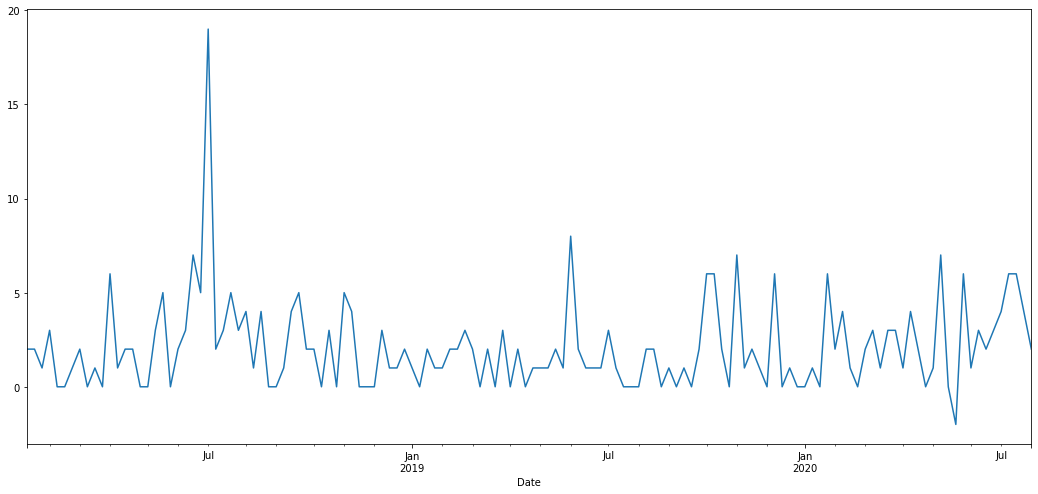

In [ ]:
target_df.plot()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = target_df['2020-01-05':]
mse = ((y_forecasted-y_truth)**2).mean()
print('Mean squared error of forecast is %s' % mse)

Mean squared error of forecast is 6.755307253928142


In [ ]:
print('Root Mean Squared Error of forecast is %s '% np.sqrt(mse))

Root Mean Squared Error of forecast is 2.599097392159082 


In [ ]:
pred_uc.summary_frame()

Qty,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-08-09,1.682282,2.407349,-3.036035,6.400599
2020-08-16,4.345529,2.433686,-0.424407,9.115465
2020-08-23,4.921822,2.466988,0.086614,9.757030
2020-08-30,4.280607,2.507822,-0.634634,9.195847
2020-09-06,5.390208,2.556653,0.379260,10.401156
2020-09-13,5.510263,2.613843,0.387225,10.633302
2020-09-20,5.328099,2.679646,0.076089,10.580108
2020-09-27,5.591664,2.754211,0.193509,10.989820
2020-10-04,9.393687,2.837595,3.832104,14.955270
2020-10-11,4.878528,2.929764,-0.863704,10.620760
